In [1]:
#get larlite
from larlite import larlite as ll

In [2]:
#create storage manager
sm = ll.storage_manager()
sm.set_io_mode(ll.storage_manager.kWRITE)
sm.set_out_filename("fakepi0.root")
sm.open()

True

In [3]:
#streamer for event_hit
event_hits = sm.get_data(ll.data.kHit,"fake_pi0")

In [4]:
#max and min wire and time
wmax = 3400.0
wmin = 0.0
tmax = 6399.0
tmin = 0.0

In [5]:
#region we want gammas in 
start1 = (wmax/2.0,tmax/3.0)
end1   = (wmax/1.2,tmax/1.2)

#gammas have some angle
slope1 = ( end1[1] - start1[1] ) / ( end1[0] - start1[0] ) * 2.0
slope2 = ( end1[1] - start1[1] ) / ( end1[0] - start1[0] ) / 2.0

In [6]:
#graphics 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
cone1 = lambda x : start1[1]+slope1*(x-start1[0])
cone2 = lambda x : start1[1]+slope2*(x-start1[0])

In [9]:
a=np.random.uniform(start1,end1,size=(1000,2))
gamma1=a[cone1(a[:,0])  < a[:,1]]
gamma2=a[cone2(a[:,0]) > a[:,1]]

#Move them 500 ticks down
gamma2[:,1] -= 500.0

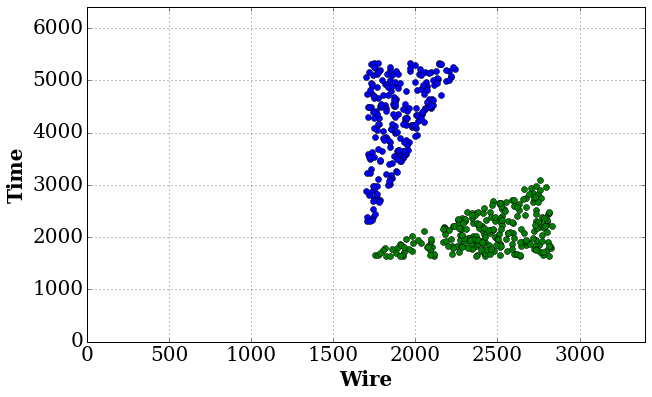

In [16]:
#show it
fig,ax=plt.subplots(figsize=(10,6))
matplotlib.rcParams['font.size']=20
matplotlib.rcParams['font.family']='serif'
ax.plot(gamma1[:,0],gamma1[:,1],'o')
ax.plot(gamma2[:,0],gamma2[:,1],'o')
ax.set_xlim(wmin,wmax)
ax.set_ylim(tmin,tmax)
ax.set_xlabel("Wire",fontweight='bold')
ax.set_ylabel("Time",fontweight='bold')
ax.grid()
plt.show()

In [17]:
#store gamma 1
for g in gamma1:
    h = ll.hit()
    h.set_wire(ll.geo.WireID(1,1,2,int(g[0])))
    h.set_time_peak(g[1],0.0)
    h.set_amplitude(100.0,0.0)
    event_hits.push_back(h)

In [18]:
#store gamma 2
for g in gamma2:
    h = ll.hit()
    h.set_wire(ll.geo.WireID(1,1,2,int(g[0])))
    h.set_time_peak(g[1],0.0)
    h.set_amplitude(100.0,0.0)
    event_hits.push_back(h)

In [19]:
#Set id for larlite id tree
sm.set_id(1,1,1)

In [20]:
#call next event to store
sm.next_event()

True

In [21]:
#close that bad boi
sm.close()

True